<a href="https://colab.research.google.com/github/DrShabirAhmad/Code/blob/main/Netflix_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/netflix.csv")

## **Basic Observations of Netflix Data Set**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:

df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

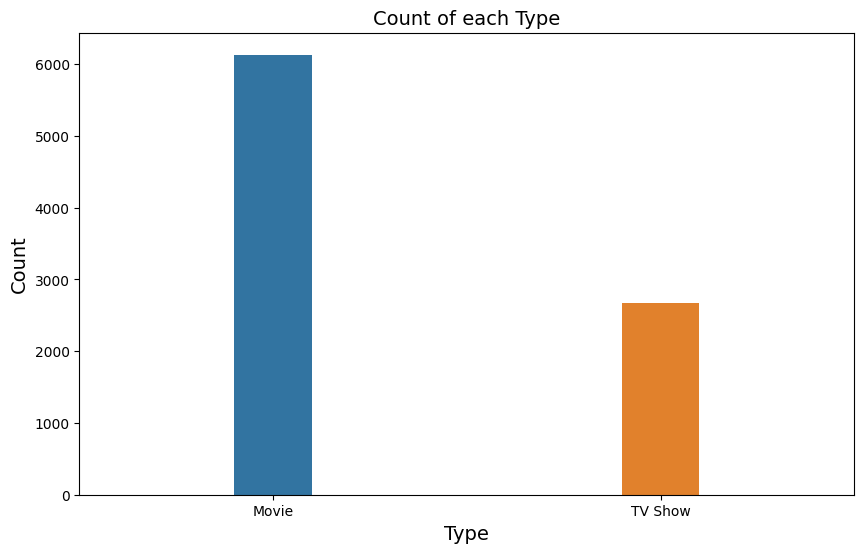

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', width=.2)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of each Type', fontsize=14)
plt.show()

In [ ]:
df.shape

(8807, 12)

In [ ]:
df['country'].nunique()

748

In [ ]:
df['title'].nunique()

8807

## **Un-nesting of Nested Columns**

In [ ]:
# Un-nesting all the columns those have cells with multiple comma separated values by creating multiple rows.
def unnest_columns(df, columns):
    for col in columns:
        df[col] = df[col].str.split(', ')
        df = df.explode(col)
    return df

In [ ]:
Nested_columns = ['director', 'cast', 'country', 'listed_in']
df = unnest_columns(df, Nested_columns)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


## **After Un-nesting the No of Columns Increased Significantly**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      151348 non-null  object
 4   cast          199845 non-null  object
 5   country       190094 non-null  object
 6   date_added    201833 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201924 non-null  object
 9   duration      201988 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


## **Detection of Missing Values from all the Columns/Variables**

In [ ]:
df.isna().sum()          # No. of missing values in each variable/column

show_id             0
type                0
title               0
director        50643
cast             2146
country         11897
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

# **Filling of Missing Values as per the directions**

In [ ]:
# Filling of all missing values by as desired
df["director"].fillna("Unknown Director", inplace=True)
df["cast"].fillna("Unknown Cast", inplace=True)
df["country"].fillna("Unknown Country", inplace=True)
df["rating"].fillna("Unknown Rating", inplace=True)
df["duration"].fillna("Unknown Duration", inplace=True)
df["date_added"].fillna(0, inplace=True)

No missing value present now in data set

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## **Observations after Un-Nesting and Filling the Missing Values**

Data types, Statistical Summary, Shape, Dimensions

In [ ]:
df.info()   # here also 0 non null value showing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   director      201991 non-null  object
 4   cast          201991 non-null  object
 5   country       201991 non-null  object
 6   date_added    201991 non-null  object
 7   release_year  201991 non-null  int64 
 8   rating        201991 non-null  object
 9   duration      201991 non-null  object
 10  listed_in     201991 non-null  object
 11  description   201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
df.describe()

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,201991,201991,201991,201991,201991,201991,201991,201991,201991,201991,201991
unique,8807,2,8807,4994,36440,128,1768,18,221,42,8775
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown Director,Unknown Cast,United States,"January 1, 2020",TV-MA,1 Season,Dramas,A troubled young girl and her mother find sola...
freq,700,145843,700,50643,2146,59349,3730,73867,35035,29775,700


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...


In [ ]:
df.shape

(201991, 12)

In [ ]:
df.ndim

2

# Non_Graphical Analysis : (Value_counts and Unique attributes)

In [ ]:
df['director'].value_counts()

Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Richard Maurice            1
Richard E. Norman          1
Spencer Williams           1
Oscar Micheaux             1
Kirsten Johnson            1
Name: director, Length: 4994, dtype: int64

In [ ]:
df['cast'].value_counts()

Unknown Cast      2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: cast, Length: 36440, dtype: int64

In [ ]:
df['release_year'].value_counts()

2018    24414
2019    21931
2017    20516
2020    19679
2016    18465
        ...  
1947        8
1946        6
1942        6
1943        5
1925        1
Name: release_year, Length: 74, dtype: int64

In [ ]:
df['listed_in'].value_counts()

Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Korean TV Shows                  1122
Cult Movies 

In [ ]:
df['rating'].value_counts()

TV-MA             73867
TV-14             43931
R                 25860
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown Rating       67
74 min                1
84 min                1
66 min                1
Name: rating, dtype: int64

In [ ]:
df["cast"].nunique()

36440

In [ ]:
df["director"].nunique()

4994

In [ ]:
df["country"].nunique()

128

In [ ]:
df["listed_in"].nunique()

42

In [ ]:
df["release_year"].nunique()

74

In [ ]:
df["rating"].nunique()

18

In [ ]:
df['title'].nunique()

8807

## **Graphical Analysis**

 Genre Wise Movies and TV Shows

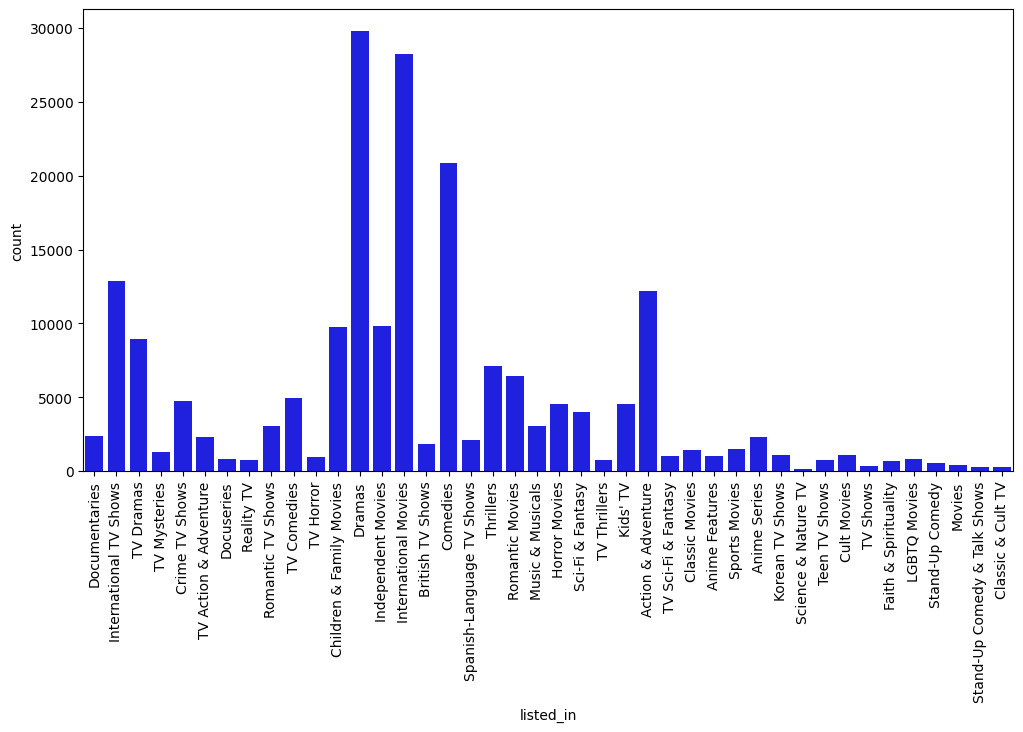

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x= 'listed_in', data=df, color= 'b')
plt.xticks(rotation=90)
plt.show()

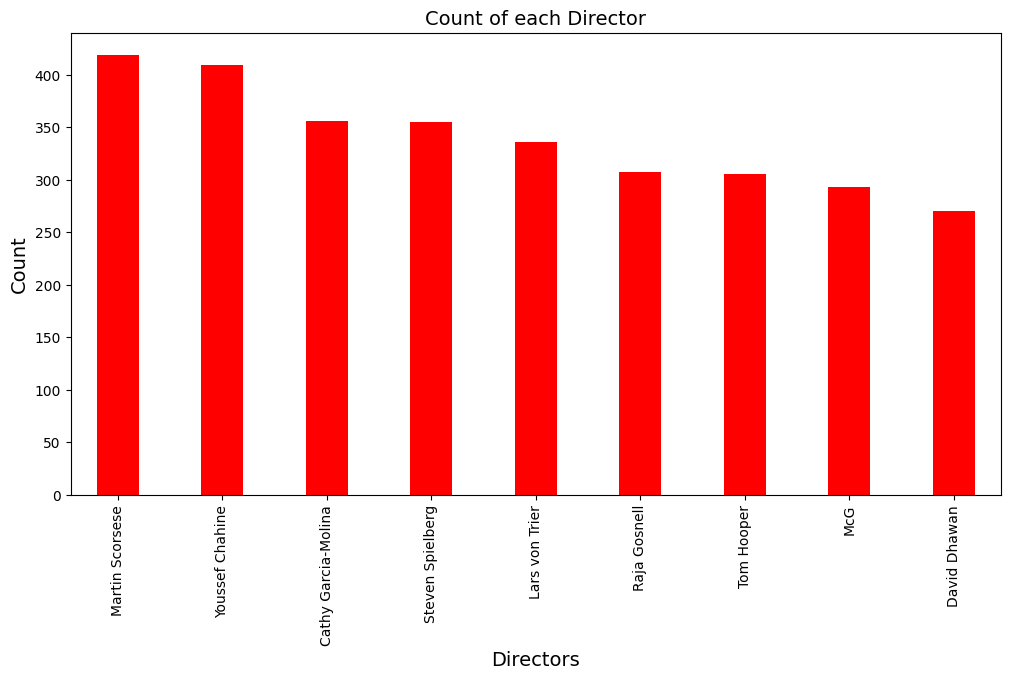

In [ ]:
top10_directors= df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top10_directors[1:10].plot(kind='bar', width=.4, color='r')         # [1:10] to remove Unknown Director
plt.xlabel('Directors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of each Director', fontsize=14)
plt.show()

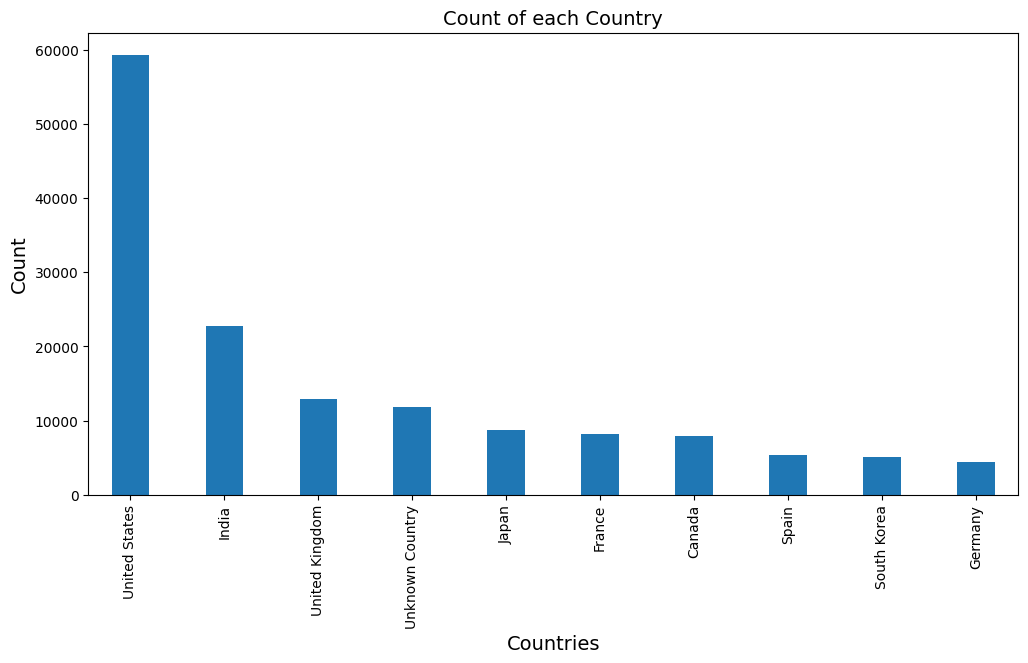

In [ ]:
plt.figure(figsize=(12, 6))
top10_country= df['country'].value_counts().head(10)
top10_country.plot(kind='bar', width=.4)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of each Country', fontsize=14)
plt.show()

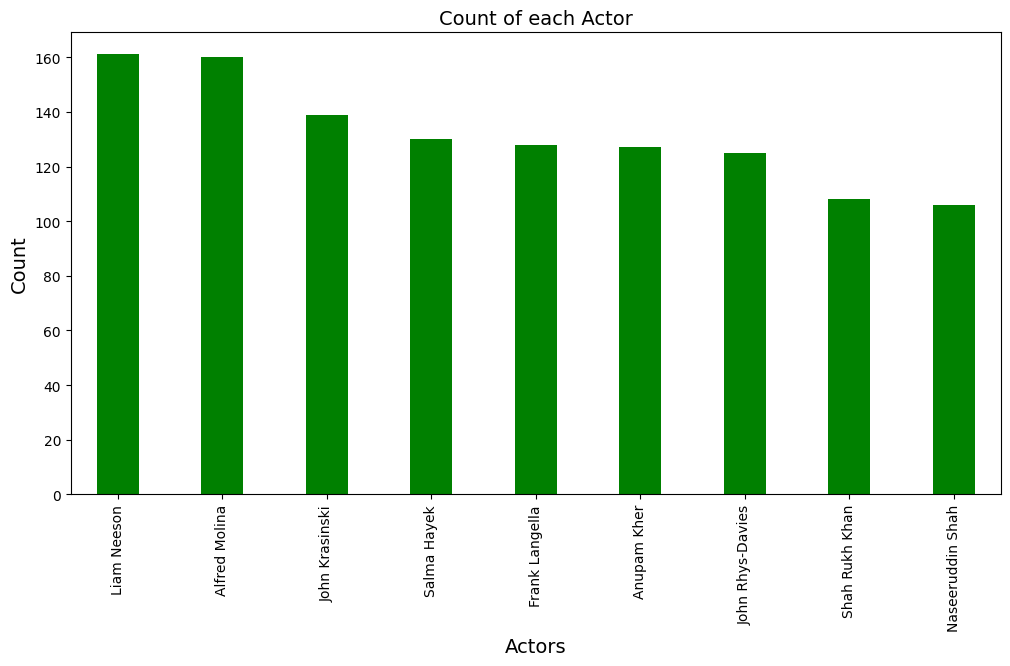

In [ ]:
top10_Actors= df['cast'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top10_Actors[1:10].plot(kind='bar', color= 'g', width=.4)         # [1:10] to remove Unknown Actor
plt.xlabel('Actors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of each Actor', fontsize=14)
plt.show()

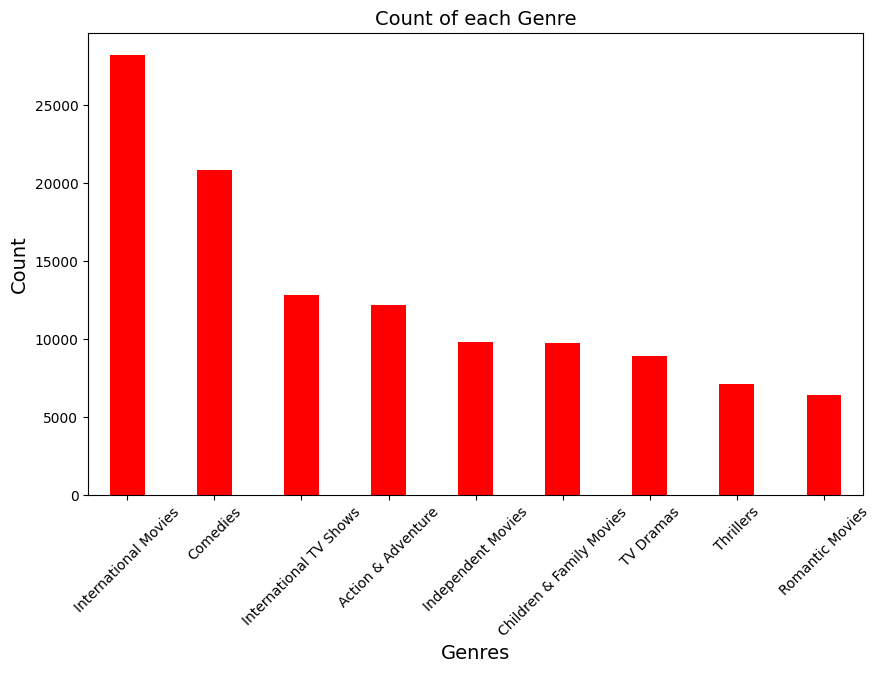

In [ ]:
top10_Genres= df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top10_Genres[1:10].plot(kind='bar', color= 'r', width=.4)         # [1:10] to remove Unknown Genre
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of each Genre', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## **Non_Graphical Analysis**

In [ ]:
top10_directors= df['director'].value_counts().head(10)
top10_directors

Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Name: director, dtype: int64

In [ ]:
top10_directors[1:10]       # Unknown Director removed from the results.

Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
Raja Gosnell           308
Tom Hooper             306
McG                    293
David Dhawan           270
Name: director, dtype: int64

In [ ]:
categorical_variables = ['type', 'director', 'cast', 'country', 'listed_in']

for col in categorical_variables:
    print(df[col].value_counts().head(10))
    print('\n')

Movie      145843
TV Show     56148
Name: type, dtype: int64


Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
Lars von Trier           336
Raja Gosnell             308
Tom Hooper               306
McG                      293
David Dhawan             270
Name: director, dtype: int64


Unknown Cast        2146
Liam Neeson          161
Alfred Molina        160
John Krasinski       139
Salma Hayek          130
Frank Langella       128
Anupam Kher          127
John Rhys-Davies     125
Shah Rukh Khan       108
Naseeruddin Shah     106
Name: cast, dtype: int64


United States      59349
India              22814
United Kingdom     12945
Unknown Country    11897
Japan               8679
France              8254
Canada              7915
Spain               5315
South Korea         5043
Germany             4383
Name: country, dtype: int64


Dramas                      29775
International Movies     

## **For Continous Variables**

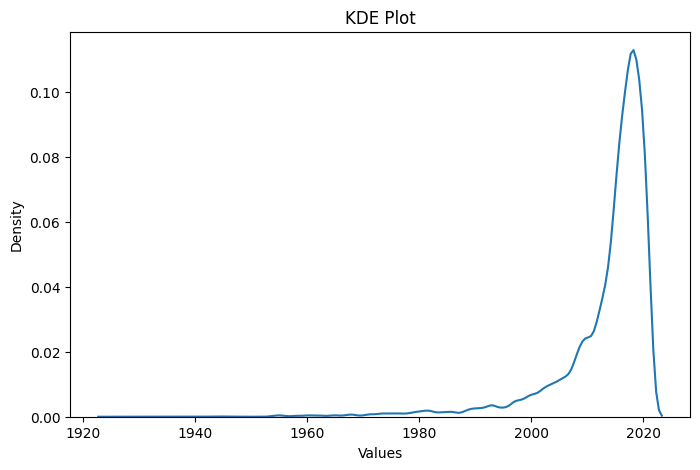

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['release_year'])
plt.title('KDE Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

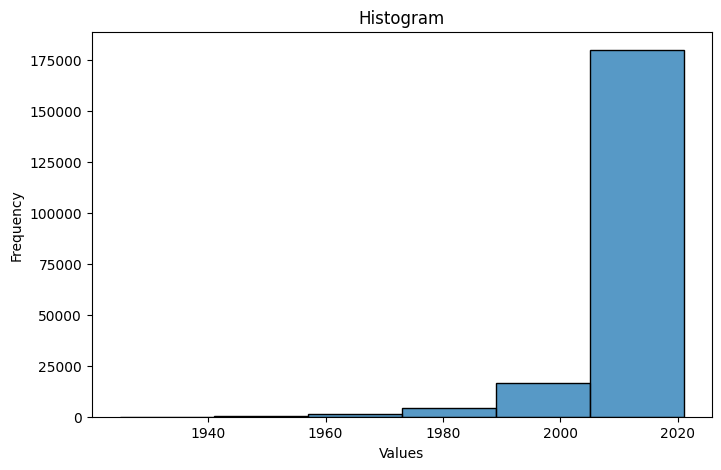

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['release_year'], bins=6)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

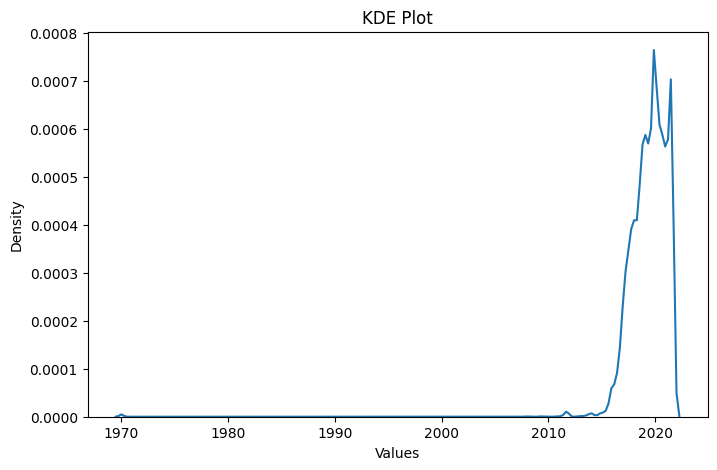

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(pd.to_datetime(df['date_added']))
plt.title('KDE Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

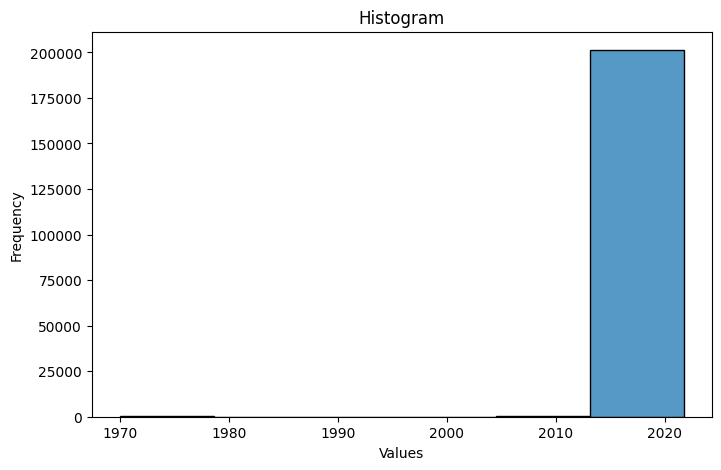

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(pd.to_datetime(df['date_added']), bins=6)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

### Outlier Analysis

## Box Plot

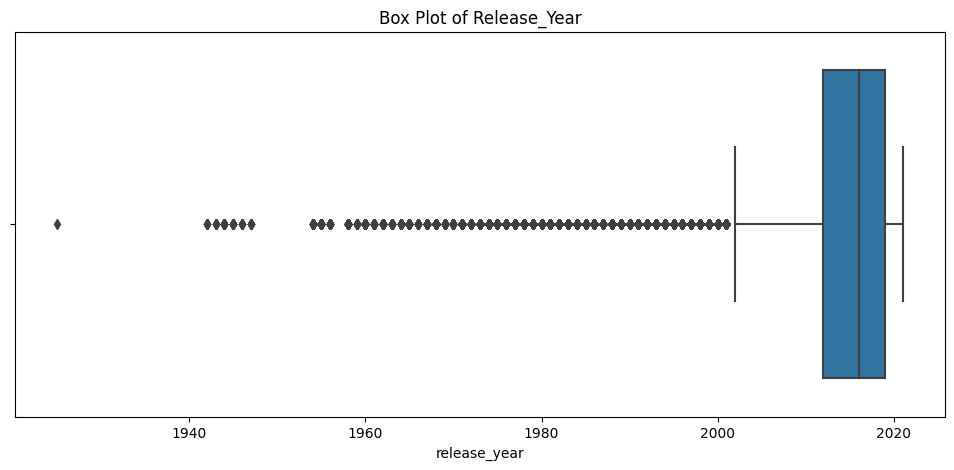

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='release_year')    # Plot box plots for numerical columns to identify outliers
plt.title("Box Plot of Release_Year")
plt.xticks(rotation=0)
plt.show()

## Heat Map

<ipython-input-127-104c10d5e493>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()       # Create correlation matrix


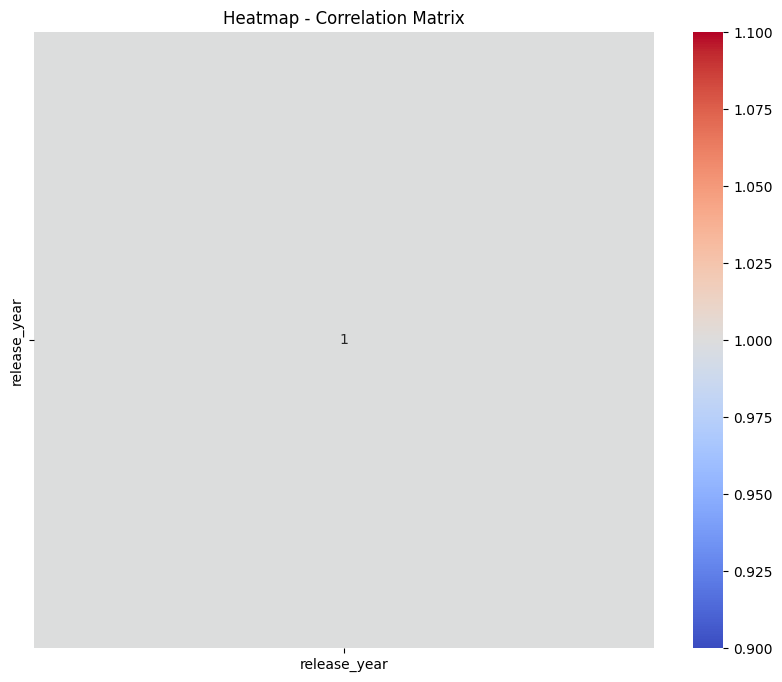

In [ ]:
correlation_matrix = df.corr()       # Create correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Heatmap - Correlation Matrix')
plt.show()

# **Comparison of TV Shows Vs Movies**

In [ ]:
movies_df = df[df['type'] == 'Movie']              # Filter rows where the "type" is "Movie"

movie_count_by_country = movies_df['country'].value_counts()
# Group by "country" and calculate the count of movies produced in each country

top_10_countries = movie_count_by_country.head(10)      # Select the top 10 countries with the highest movie counts

print(top_10_countries)

United States      45816
India              21411
United Kingdom      8560
France              6607
Unknown Country     6199
Canada              5738
Japan               3525
Spain               3469
Germany             3427
China               2377
Name: country, dtype: int64


In [ ]:
movies_df = df[df['type'] == 'Movie']
top10_Movies_country = movies_df.groupby('country')['title'].count().sort_values(ascending=False).head(10)
top10_Movies_country

country
United States      45816
India              21411
United Kingdom      8560
France              6607
Unknown Country     6199
Canada              5738
Japan               3525
Spain               3469
Germany             3427
China               2377
Name: title, dtype: int64

In [ ]:
movies_df = df[df['type'] == 'Movie']
top10_Movies_country = movies_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
top10_Movies_country

country
United States      2751
India               962
United Kingdom      532
Unknown Country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

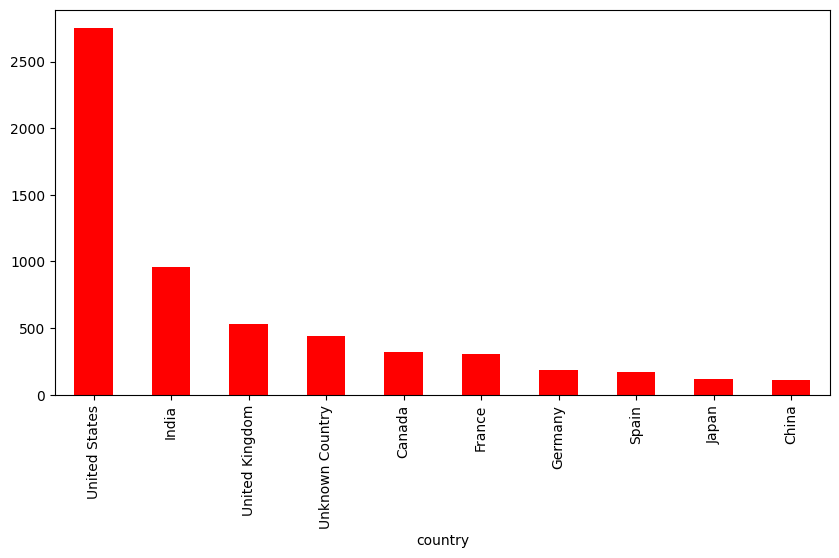

In [ ]:
plt.figure(figsize=(10, 5))
top10_Movies_country.plot(kind='bar', color='r')
plt.show()

In [ ]:
TV_Show_df = df[df['type'] == 'TV Show']
top10_TV_Show_Country = TV_Show_df.groupby('country')['title'].count().sort_values(ascending=False).head(10)
top10_TV_Show_Country

country
United States      13533
Unknown Country     5698
Japan               5154
United Kingdom      4385
South Korea         3754
Canada              2177
Mexico              2018
Spain               1846
Taiwan              1719
France              1647
Name: title, dtype: int64

In [ ]:
TV_Show_df = df[df['type'] == 'TV Show']
top10_TV_Show_Country = TV_Show_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
top10_TV_Show_Country

country
United States      938
Unknown Country    391
United Kingdom     272
Japan              199
South Korea        170
Canada             126
France              90
India               84
Taiwan              70
Australia           66
Name: title, dtype: int64

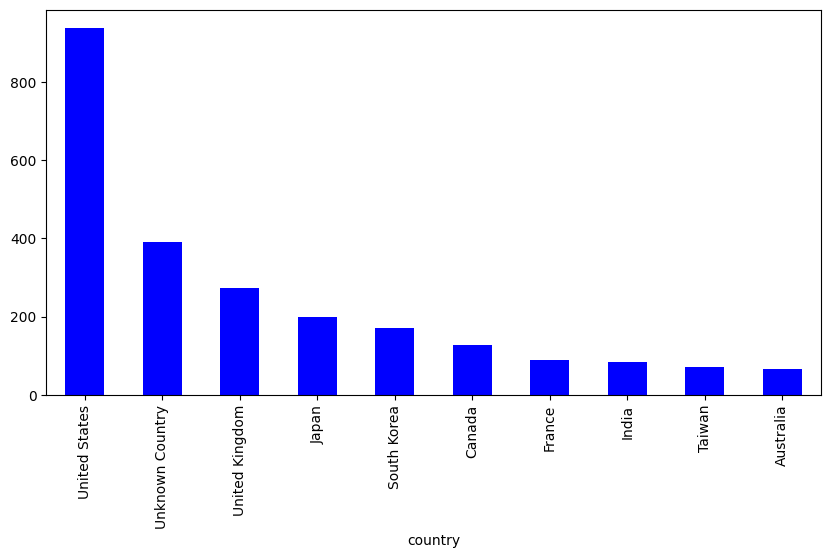

In [ ]:
plt.figure(figsize=(10, 5))
top10_TV_Show_Country.plot(kind='bar', color='b')
plt.show()

## **Best Time to Launch a TV Show**

In [ ]:
df['Timestamp']=pd.to_datetime(df['date_added'])
df['Month']=df['Timestamp'].dt.month
df['Week']=df['Timestamp'].dt.isocalendar().week

## **Best Week**

In [ ]:
tv_show_weekly_counts = df[df['type'] == 'TV Show']['Week'].value_counts()
tv_show_weekly_counts

27    1977
35    1945
24    1702
26    1662
31    1646
13    1554
48    1513
5     1386
44    1380
18    1364
40    1362
15    1230
51    1194
50    1182
19    1181
33    1180
1     1176
46    1155
22    1150
52    1130
38    1128
37    1127
49    1074
53    1071
21    1044
12    1002
7     1001
8      976
32     968
23     964
20     939
11     927
42     900
25     896
36     879
17     864
45     855
34     834
14     828
9      826
2      812
29     797
4      788
41     764
10     743
39     743
30     731
47     678
6      613
3      601
28     586
43     566
16     554
Name: Week, dtype: Int64

In [ ]:
tv_show_weekly_counts.head(1)             # Best week for TV Show release

27    1977
Name: Week, dtype: Int64

In [ ]:
Movie_weekly_counts = df[df['type'] == 'Movie']['Week'].value_counts()
Movie_weekly_counts

1     8456
44    5563
9     5094
35    5048
26    4931
40    4878
31    4388
27    3808
48    3737
18    3686
13    3503
39    3502
30    3262
22    3237
23    3164
5     3148
15    3083
28    2744
7     2636
17    2627
14    2609
36    2585
25    2568
37    2559
43    2521
10    2515
50    2463
33    2418
29    2335
34    2332
16    2323
51    2276
11    2225
49    2181
42    2105
38    2086
3     2031
24    1920
52    1840
20    1829
41    1807
47    1740
6     1649
19    1630
2     1618
21    1606
8     1538
46    1519
12    1431
53    1413
45    1396
32    1233
4     1047
Name: Week, dtype: Int64

In [ ]:
Movie_weekly_counts.head(1)                 # Best week for Movie release

1    8456
Name: Week, dtype: Int64

## **Best Month**

In [ ]:
tv_show_monthly_counts = df[df['type'] == 'TV Show']['Month'].value_counts()
tv_show_monthly_counts

12    5498
7     5227
8     5162
6     5043
9     4900
4     4543
11    4532
1     4465
3     4352
10    4255
5     4248
2     3923
Name: Month, dtype: int64

In [ ]:
tv_show_monthly_counts.head(1)              # Best Month for TV Show to release

12    5498
Name: Month, dtype: int64

In [ ]:
Movie_monthly_counts = df[df['type'] == 'Movie']['Month'].value_counts()
Movie_monthly_counts

7     15049
1     13947
10    13514
9     13219
12    12768
4     12538
8     11924
6     11616
3     11489
11    11063
5      9579
2      9137
Name: Month, dtype: int64

In [ ]:
Movie_monthly_counts.head(1)              # Best Month for TV Show to release

7    15049
Name: Month, dtype: int64

In [ ]:
tv_shows_per_year = df[df['type'] == 'TV Show']['Month'].value_counts().sort_index()
movies_per_year = df[df['type'] == 'Movie']['Month'].value_counts().sort_index()

In [ ]:
# Convert the "date_added" column to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the week number from the "date_added" column
df['week_number'] = df['date_added'].dt.isocalendar().week

# Separate data for TV shows and movies
tv_shows_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']

# Count TV shows and movies added in each week
tv_show_weekly_count = tv_shows_df['week_number'].value_counts().sort_index()
movie_weekly_count = movies_df['week_number'].value_counts().sort_index()

# Find the best week to release TV shows and movies
best_week_tv_show = tv_show_weekly_count.idxmax()
best_week_movie = movie_weekly_count.idxmax()


In [ ]:
best_week_tv_show

27

In [ ]:
best_week_movie

1

**Top Ten Casts in Movies & TV Shows**


In [ ]:
# Group by cast and type (TV Show or Movie) and calculate the count of unique titles
grouped_data = df.groupby(['cast', 'type'])['title'].nunique().reset_index()

# Separate data for TV shows and movies
tv_shows_data = grouped_data[grouped_data['type'] == 'TV Show']
movies_data = grouped_data[grouped_data['type'] == 'Movie']

# Sort the data in descending order to find the top 10 casts
top_10_casts_tv_shows = tv_shows_data.sort_values(by='title', ascending=False).head(11)[1:11]
top_10_casts_movies = movies_data.sort_values(by='title', ascending=False).head(11)[1:11]


In [ ]:
print("Top 10 Casts in Movies:")
print(top_10_casts_movies)

Top 10 Casts in Movies:
                   cast   type  title
3179        Anupam Kher  Movie     42
34225    Shah Rukh Khan  Movie     35
27208  Naseeruddin Shah  Movie     32
28569           Om Puri  Movie     30
954        Akshay Kumar  Movie     30
28965      Paresh Rawal  Movie     28
18761     Julie Tejwani  Movie     28
1996   Amitabh Bachchan  Movie     28
32524      Rupa Bhimani  Movie     27
5075        Boman Irani  Movie     27


In [ ]:
print("Top 10 Casts in TV Shows:")
print(top_10_casts_tv_shows)

Top 10 Casts in TV Shows:
                     cast     type  title
36532    Takahiro Sakurai  TV Show     25
40193           Yuki Kaji  TV Show     19
18903      Junichi Suwabe  TV Show     17
8159          Daisuke Ono  TV Show     17
787             Ai Kayano  TV Show     17
40169     Yuichi Nakamura  TV Show     16
18832        Jun Fukuyama  TV Show     15
40036    Yoshimasa Hosoya  TV Show     15
8805   David Attenborough  TV Show     14
38911        Vincent Tong  TV Show     13


## **Top Ten Directors for Movies & TV Shows**

In [ ]:
# Group by cast and type (TV Show or Movie) and calculate the count of unique titles
grouped_data = df.groupby(['director', 'type'])['title'].nunique().reset_index()

# Separate data for TV shows and movies
tv_shows_data = grouped_data[grouped_data['type'] == 'TV Show']
movies_data = grouped_data[grouped_data['type'] == 'Movie']

# Sort the data in descending order to find the top 10 casts
top_10_directors_tv_shows = tv_shows_data.sort_values(by='title', ascending=False).head(11)[1:11]
top_10_directors_movies = movies_data.sort_values(by='title', ascending=False).head(11)[1:11]


In [ ]:
print("Top 10 Directors in Movies:")
print(top_10_directors_movies)

Top 10 Directors in Movies:
                 director   type  title
3810        Rajiv Chilaka  Movie     22
1931            Jan Suter  Movie     21
3863          Raúl Campos  Movie     19
4529          Suhas Kadav  Movie     16
2912         Marcus Raboy  Movie     15
1982            Jay Karas  Movie     15
767   Cathy Garcia-Molina  Movie     13
2993      Martin Scorsese  Movie     12
1979          Jay Chapman  Movie     12
5025      Youssef Chahine  Movie     12


In [ ]:
print("Top 10 Directors in TV Shows:")
print(top_10_directors_tv_shows)

Top 10 Directors in TV Shows:
                   director     type  title
2490              Ken Burns  TV Show      3
147     Alastair Fothergill  TV Show      3
4431            Stan Lathan  TV Show      2
2123          Joe Berlinger  TV Show      2
1778            Hsu Fu-chun  TV Show      2
1548  Gautham Vasudev Menon  TV Show      2
1810         Iginio Straffi  TV Show      2
2807            Lynn Novick  TV Show      2
4342            Shin Won-ho  TV Show      2
3962        Rob Seidenglanz  TV Show      2


## **Popular or More Produced Genre Movies**

In [ ]:
# Split the genres in the "listed_in" column and create a new DataFrame with each genre in a separate row
genre_df = df['listed_in'].reset_index(drop=True)

# Calculate the count of each genre
genre_counts = genre_df.value_counts().head(10)

print(genre_counts)

Dramas                      29775
International Movies        28211
Comedies                    20829
International TV Shows      12845
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
TV Dramas                    8942
Thrillers                    7107
Romantic Movies              6412
Name: listed_in, dtype: int64


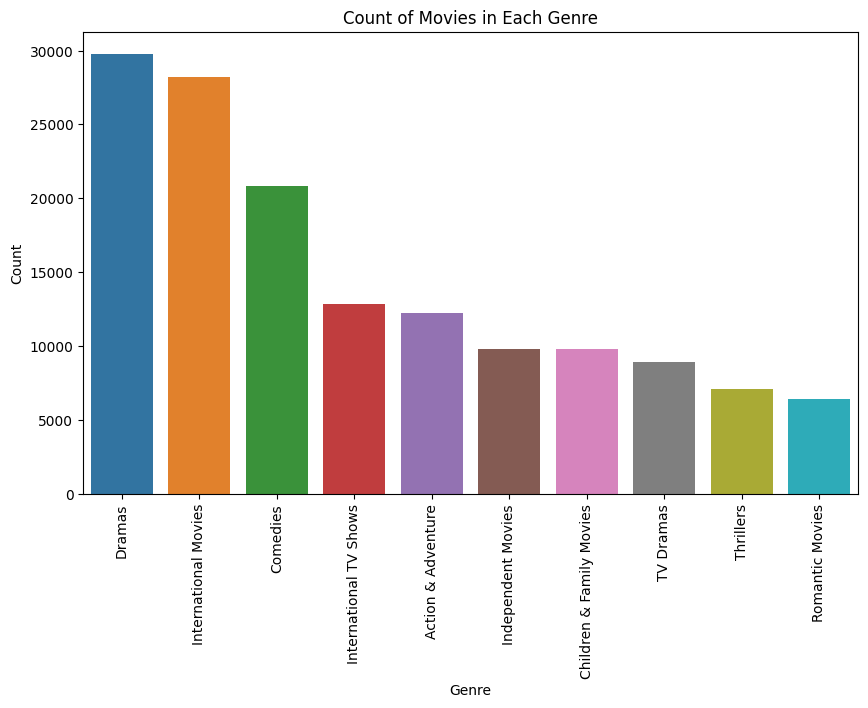

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Movies in Each Genre')
plt.show()

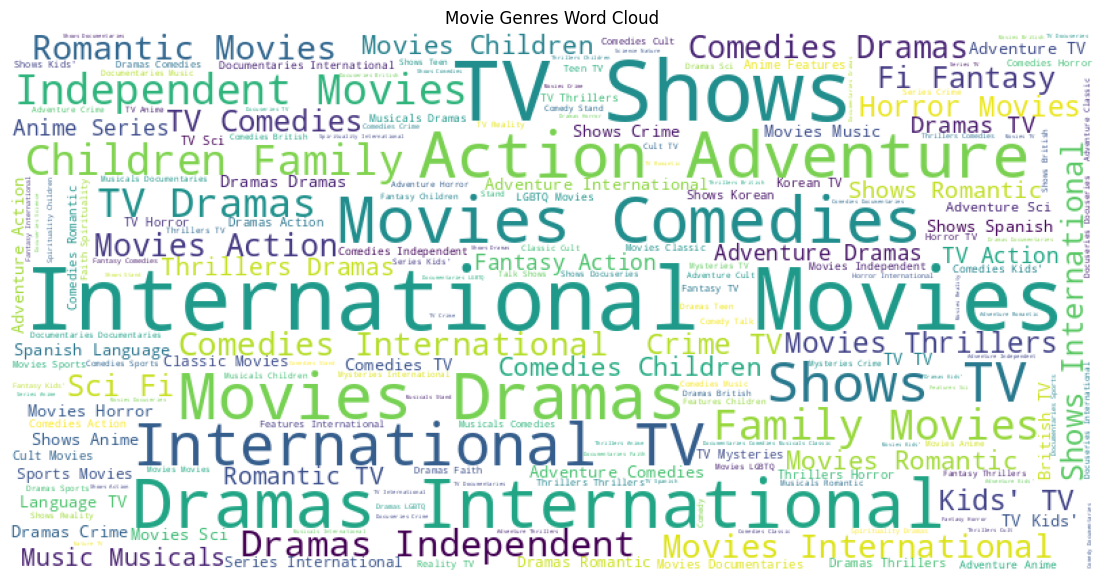

In [ ]:
from wordcloud import WordCloud

# Concatenate all genres from the "listed_in" column
all_genres = ' '.join(df['listed_in'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Movie Genres Word Cloud')
plt.show()

## **Number of Days Movie will be added to Netflix after its Release**

In [ ]:
# Convert the "date_added" column to a datetime format
df['Release_date'] = pd.to_datetime(df['date_added'])

# Calculate the difference between "date_added" and "release_year" in days
df['days_to_add'] = (df['Release_date'] - pd.to_datetime(df['release_year'])).dt.days

# Find the mode of the "days_to_add" column
mode_days = df['days_to_add'].mode().iloc[0]

In [ ]:
mode_days

18261

## **No of Movies Released per Year over the last 20-30 Years**

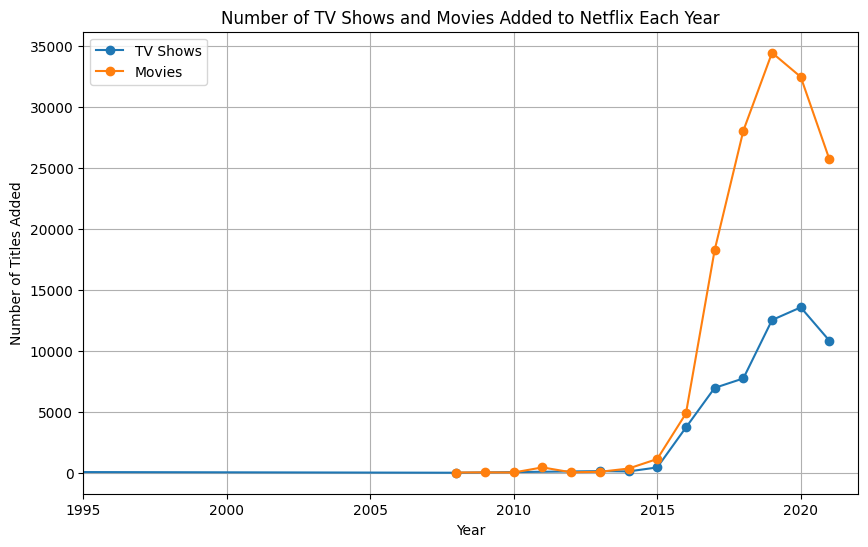

In [ ]:
# Convert the "date_added" column to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year         # Create a new column "year_added"

# Count the number of TV shows and movies added in each year
tv_shows_per_year = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()
movies_per_year = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()

# Plot the number of TV shows and movies added per year
plt.figure(figsize=(10, 6))
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='TV Shows', marker='o')
plt.plot(movies_per_year.index, movies_per_year.values, label='Movies', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Number of TV Shows and Movies Added to Netflix Each Year')
plt.xlim(left=1995, right=2022)
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.show()

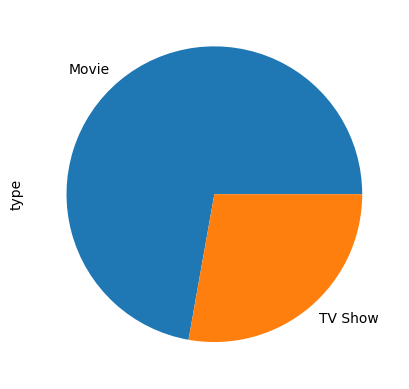

In [ ]:
df["type"].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['release_year'].min()

1925

In [ ]:
df['release_year'].max()

2021